# Tema HMM, Programare și modelare probabilistică
**Autor:** Adia-Ioana Romanescu (3A3)

## Enunț exercițiul 1
Pe baza definiţiei unui model Markov ascuns, demonstraţi formula recurenţei pentru variabila forward de la pagina 23 a cursului 4.

## Demonstrație
Formula pe care dorim să o demonstrăm este:
$$
\alpha_t(j) = \left[ \sum_{i=1}^{n} \alpha_{t-1}(i) \cdot a_{ij} \right] b_j(o_t)
$$

unde:
- $\alpha_t(j) = P(o_1, o_2, \ldots, o_t, S_t = q_j | \lambda)$, adică probabilitatea de a observa secvența $o_1, o_2, \ldots, o_t$ și de a fi în starea $q_j$ la momentul $t$,
- $a_{ij} = P(S_t = q_j | S_{t-1} = q_i)$ reprezintă probabilitatea de tranziție între stările $q_i$ și $q_j$,
- $b_j(o_t) = P(o_t | S_t = q_j)$ este probabilitatea de observare a simbolului $o_t$ în starea $q_j$.

Vom demonstra folosind metoda inducției matematice.

### Pasul de bază: Verificăm formula pentru $t = 0$

Pentru $t = 1$, formula forward $\alpha_0(j)$ ar trebui să reprezinte probabilitatea ca secvența observată să conțină doar observația inițială $o_1$ și să fie în starea $q_j$ la timpul $t = 1$. Conform definiției, avem:
$$
\alpha_1(j) = P(o_1, S_1 = q_j | \lambda) = P(S_1 = q_j | \lambda) \cdot P(o_1 | S_1 = q_j)
$$

Întrucât probabilitatea inițială a stării $q_j$ este dată de $\pi_j = P(S_1 = q_j)$ și probabilitatea observației $o_1$ în starea $q_j$ este $b_j(o_1)$, rezultă că:
$$
\alpha_1(j) = \pi_j \cdot b_j(o_1)
$$

Aceasta este formula corectă pentru $t = 0$, deci pasul de bază este verificat.

### Pasul inductiv
Presupunem că formula este valabilă pentru $t - 1$ și vom demonstra că are loc și pentru timpul $t$.

Cunoscând că formula are loc pentru pasul $t - 1$, adică:
$$
\alpha_{t-1}(i) = \left[ \sum_{k=1}^{n} \alpha_{t-2}(k) \cdot a_{ki} \right] b_i(o_{t-1})
$$

Ar trebui să rezulte că această relație este valabilă și pentru timpul $t$, adică:
$$
\alpha_t(j) = \left[ \sum_{i=1}^{n} \alpha_{t-1}(i) \cdot a_{ij} \right] b_j(o_t)
$$

### Demonstrăm formula pentru timpul $t$

Pentru a calcula $\alpha_t(j)$, vom folosi definiția probabilităților condiționate și structura de tranziție a modelului Markov ascuns. Astfel, $\alpha_t(j)$ poate fi descompusă ca suma probabilităților de a ajunge în $q_j$ la momentul $t$ din fiecare stare $q_i$ la momentul $t-1$, urmată de observarea lui $o_t$:
$$
\alpha_t(j) = P(o_1, o_2, \ldots, o_t, S_t = q_j | \lambda)
$$

Aplicăm regula sumei pentru toate stările posibile $q_i$ la timpul $t-1$:
$$
\alpha_t(j) = \sum_{i=1}^{n} P(o_1, o_2, \ldots, o_t, S_{t-1} = q_i, S_t = q_j | \lambda)
$$

Folosind independența condițională a HMM, obținem:
$$
\alpha_t(j) = \sum_{i=1}^{n} P(o_1, o_2, \ldots, o_{t-1}, S_{t-1} = q_i | \lambda) \cdot P(S_t = q_j | S_{t-1} = q_i) \cdot P(o_t | S_t = q_j)
$$

Observăm că $P(o_1, o_2, \ldots, o_{t-1}, S_{t-1} = q_i | \lambda)$ este tocmai $\alpha_{t-1}(i)$. În plus, $P(S_t = q_j | S_{t-1} = q_i) = a_{ij}$ și $P(o_t | S_t = q_j) = b_j(o_t)$.

Astfel, formula devine:
$$
\alpha_t(j) = \sum_{i=1}^{n} \alpha_{t-1}(i) \cdot a_{ij} \cdot b_j(o_t)
$$

sau, echivalent:
$$
\alpha_t(j) = \left[ \sum_{i=1}^{n} \alpha_{t-1}(i) \cdot a_{ij} \right] b_j(o_t)
$$

### Concluzie
Am demonstrat formula de recurență pentru variabila *forward* folosind inducția matematică, arătând că relația este valabilă pentru $t=0$ și că, dacă este valabilă pentru $t-1$, atunci este valabilă și pentru $t$.


## Enunț exercițiul 2

Reluați exercițiul de la laborator, de data aceasta implementând direct algoritmul Viterbi descris în cursul 4. Mai jos redăm enunțul acestuia:

Un profesor dă teste care pot fi dificile, medii sau ușoare. Probabilitatea dificultății primului test este aceeași. Dacă, la un moment dat, dă un test dificil, următorul test poate fi doar mediu sau ușor, cu aceeași probabilitate. Însă dacă dă un test mediu sau ușor, atunci următorul test va fi dificil cu probabilitate 0.5, sau mediu sau ușor cu aceeași probabilitate, 0.25.

Nota unui student la test, FB, B, S sau NS depinde de dificultatea testului. Astfel, probabilitățile condiționate ale notei obținute, dată fiind dificultatea testului, sunt:

- **Test dificil:** [0.1, 0.2, 0.4, 0.3]
- **Test mediu:** [0.15, 0.25, 0.5, 0.1]
- **Test ușor:** [0.2, 0.3, 0.4, 0.1]

Să presupunem că ați observat următoarea secvență de note: FB, FB, S, B, B, S, B, B, NS, B, B, S. Determinați cea mai probabilă secvență de dificultăți pentru testele corespunzătoare și probabilitatea acesteia.

## Rezolvare exercițiu 2

In [10]:
!pip install hmmlearn
!pip install numpy

Cea mai probabilă secvență de dificultăți: ['dificil', 'usor', 'dificil', 'usor', 'dificil', 'mediu', 'dificil', 'usor', 'dificil', 'usor', 'dificil', 'mediu']
Probabilitatea acestei secvențe: 0.000000000021093750157851724336
(2)Cea mai probabilă secvență de dificultăți: ['dificil', 'usor', 'dificil', 'usor', 'dificil', 'mediu', 'dificil', 'usor', 'dificil', 'usor', 'dificil', 'mediu']
(2)Probabilitatea acestei secvențe: 0.000000000021093750000000004706


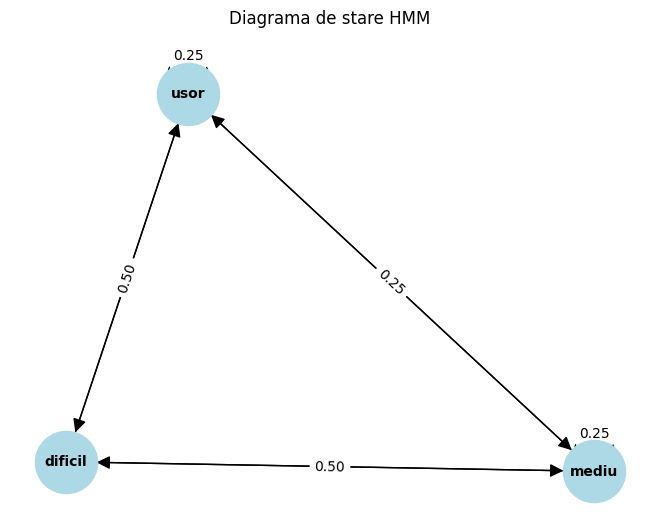

In [40]:
import numpy as np
from decimal import Decimal, getcontext
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

# Set the precision for Decimal operations
getcontext().prec = 30  # Set precision to 50 decimal places

# Definirea stărilor și observațiilor
states = ["dificil", "mediu", "usor"]
observations = ["FB", "B", "S", "NS"]
n_states = len(states)

# Probabilitățile de tranziție între stări
transition_matrix = np.array([
    [Decimal(0.0), Decimal(0.5), Decimal(0.5)],   # dificil -> [mediu, usor]
    [Decimal(0.5), Decimal(0.25), Decimal(0.25)], # mediu -> [dificil, mediu, usor]
    [Decimal(0.5), Decimal(0.25), Decimal(0.25)]  # usor -> [dificil, mediu, usor]
], dtype=object)

# Probabilitățile de emisie pentru fiecare stare
emission_matrix = np.array([
    [Decimal(0.1), Decimal(0.2), Decimal(0.4), Decimal(0.3)],  # dificil: [FB, B, S, NS]
    [Decimal(0.15), Decimal(0.25), Decimal(0.5), Decimal(0.1)], # mediu: [FB, B, S, NS]
    [Decimal(0.2), Decimal(0.3), Decimal(0.4), Decimal(0.1)]    # usor: [FB, B, S, NS]
], dtype=object)

# Probabilitățile inițiale pentru fiecare stare
initial_probabilities = np.array([Decimal(1) / Decimal(3)] * n_states, dtype=object)

# Secvența de observații
observed_sequence = ["FB", "FB", "S", "B", "B", "S", "B", "B", "NS", "B", "B", "S"]
observed_indices = [observations.index(obs) for obs in observed_sequence]
def viterbi2(observed_indices, states, initial_probabilities, transition_matrix, emission_matrix):
    n_observations = len(observed_indices)
    n_states = len(states)
    
    # Faza 1: Inițializare
    dp = np.zeros((n_states, n_observations), dtype=float)  # Probabilities array
    path = np.zeros((n_states, n_observations), dtype=int)  # Path array

    for s in range(n_states):
        dp[s, 0] = float(initial_probabilities[s]) * float(emission_matrix[s, observed_indices[0]])  # Convert to float
        path[s, 0] = 0  # La început, nu există traseu anterior

    # Faza 2: Recursie
    for t in range(1, n_observations):  # Corectat pentru a începe de la t=1
        for j in range(n_states):
            # Calculăm δt(j) pe baza valorilor δt−1(i)
            prob_transitions = [dp[i, t - 1] * float(transition_matrix[i, j]) for i in range(n_states)]  # Convert to float
            dp[j, t] = max(prob_transitions) * float(emission_matrix[j, observed_indices[t]])  # Convert to float
            path[j, t] = np.argmax(prob_transitions)  # ψt(j) = Argmax_i[δt−1(i) * aij]

    # Faza 3: Terminare
    max_final_prob = max(dp[:, n_observations - 1])  # P* = max_i[δT(i)]
    last_state = np.argmax(dp[:, n_observations - 1])  # q*T = Argmax_i[δT(i)]

    # Faza 4: Backtracking
    most_probable_states = [last_state]
    for t in range(n_observations - 1, 0, -1):
        most_probable_states.insert(0, path[most_probable_states[0], t])  # q*t−1 = ψt(q*t)

    # Convertim indicele stărilor la numele lor
    most_probable_states_names = [states[state] for state in most_probable_states]
    
    return most_probable_states_names, max_final_prob 

# Implementarea algoritmului Viterbi folosind log probabilități
def viterbi(observed_indices, states, initial_probabilities, transition_matrix, emission_matrix):
    n_observations = len(observed_indices)
    n_states = len(states)
    
    # Convert probabilities to log space, replacing 0 with a small value
    epsilon = 1e-10  # A small positive value to avoid log(0)
    log_transition_matrix = np.log(np.array(transition_matrix, dtype=float) + epsilon)
    log_emission_matrix = np.log(np.array(emission_matrix, dtype=float) + epsilon)
    log_initial_probabilities = np.log(np.array(initial_probabilities, dtype=float) + epsilon)

    # Faza 1: Inițializare
    dp = np.full((n_states, n_observations), -np.inf)  # Log probabilities, initialized to -inf
    path = np.zeros((n_states, n_observations), dtype=int)

    # Inițializarea pentru pasul 1
    for s in range(n_states):
        dp[s, 0] = log_initial_probabilities[s] + log_emission_matrix[s, observed_indices[0]]  # log(πi) + log(bi(o1))
        path[s, 0] = 0  # La început, nu există traseu anterior

    # Faza 2: Inducție
    for t in range(1, n_observations):  # Începem de la t=1
        for i in range(n_states):
            maxbuf = -np.inf
            for j in range(n_states):
                buf = log_transition_matrix[j, i] + dp[j, t - 1]
                if buf > maxbuf:
                    maxbuf = buf
            dp[i, t] = maxbuf + log_emission_matrix[i, observed_indices[t]]  # log(δt(j))

    # Faza 3: Terminare
    maxbuf = -np.inf
    max_pos = 0
    for j in range(n_states):
        buf = dp[j, n_observations - 1]  # Probabilitatea logaritmică finală
        if buf > maxbuf:
            maxbuf = buf
            max_pos = j
            
    logprob = maxbuf
    state_sequence = np.zeros(n_observations, dtype=int)
    state_sequence[n_observations - 1] = max_pos

    # Faza 4: Backtracking
    for t in range(n_observations - 2, -1, -1):
        maxbuf = -np.inf
        for j in range(n_states):
            buf = dp[j, t] + log_transition_matrix[j, state_sequence[t + 1]]
            if buf > maxbuf:
                maxbuf = buf
                max_pos = j
        state_sequence[t] = max_pos

    most_probable_states_names = [states[state] for state in state_sequence]
    
    return most_probable_states_names, np.exp(logprob)  # Return the most probable states and the probability

# Apelul funcției Viterbi și afișarea rezultatului
most_probable_states, probability = viterbi(observed_indices, states, initial_probabilities, transition_matrix, emission_matrix)

#most_probable_states1, probability1 = viterbi1(observed_indices, states, initial_probabilities, transition_matrix, emission_matrix)

most_probable_states2, probability2 = viterbi2(observed_indices, states, initial_probabilities, transition_matrix, emission_matrix)
print("Cea mai probabilă secvență de dificultăți:", most_probable_states)
print("Probabilitatea acestei secvențe:", f"{probability:.30f}")
#print("(1)Cea mai probabilă secvență de dificultăți:", most_probable_states1)
#print("(1)Probabilitatea acestei secvențe:", f"{probability1:.30f}")

print("(2)Cea mai probabilă secvență de dificultăți:", most_probable_states2)
print("(2)Probabilitatea acestei secvențe:", f"{probability2:.30f}")
# Numărătoarea stărilor
state_counts = Counter(most_probable_states)
state_labels = list(state_counts.keys())
state_values = list(state_counts.values())

def plot_hmm_graph(states, transition_matrix):
    G = nx.DiGraph()
    for i, state in enumerate(states):
        G.add_node(state)
    for i, state_from in enumerate(states):
        for j, state_to in enumerate(states):
            prob = transition_matrix[i, j]
            if prob > 0:
                G.add_edge(state_from, state_to, weight=float(prob), label=f"{float(prob):.2f}")

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.title("Diagrama de stare HMM")
    plt.show()

plot_hmm_graph(states, transition_matrix)
